In [1]:
import ast
import pandas as pd
import torch

from data_processing import save_probabilities
from visualization import view_plateau

In [2]:
# checkpoint = torch.load('../saved_models/orthography_3gen.pth')
# train_char_probs = checkpoint['train_char_prediction_probs']
# valid_char_probs = checkpoint['valid_char_prediction_probs']

# save_probabilities(valid_char_probs, nlexique[['lexeme', 'gen']], '../results/orthography_3gen.csv', mode='w', set='validation')
# save_probabilities(train_char_probs, nlexique[['lexeme', 'gen']], '../results/orthography_3gen.csv', mode='a', set='train')

# or3_results = pd.read_csv('../results/orthography_3gen.csv')
# or3_results

In [3]:
# or3_results['Noun_Length'] = or3_results['Nouns'].apply(len)
# or3_results['Probabilities_Length'] = or3_results['Class Probabilities'].apply(lambda x: len(ast.literal_eval(x)))

# filtered_df = or3_results[or3_results['Probabilities_Length'] != or3_results['Noun_Length']]

# filtered_df

## Suffix vs Non-suffix Words

In [4]:
nlexique = pd.read_csv('../data/nlexique.csv')
nlexique = nlexique[['lexeme', 'sg', 'gen']].rename(columns={'sg': 'phon'}).dropna().reset_index(drop=True)
nlexique

,lexeme,phon,gen
0,à-côté,akOte,m
1,à-coup,aku,m
2,à-peu-près,apØpʁɛ,m
3,à-pic,apik,m
4,à-plat,apla,m
...,...,...,...
30999,zurichois,zyʁikwa,m
31000,zydeco,zidəko,f
31001,zygoma,zigOma,m
31002,zygote,zigɔt,m


In [5]:
echantinom = pd.read_csv('../data/Echantinom-full-20210902.csv')
echantinom = echantinom[~echantinom['lemma'].isin(nlexique[nlexique['gen'] == 'b']['lexeme'])][['lemma', 'phon', 'gen']]
echantinom

,lemma,phon,gen
0,berlingue,bɛʁ.lɛ̃g,m
1,corton,kɔʁ.tɔ̃,m
2,dabuche,da.byʃ,f
3,faf,faf,m
4,gail,gaj,f
...,...,...,...
4995,palu,pa.ly,m
4996,talc,talk,m
4997,sauvetage,sO.və.taʒ,m
4998,plaid,plɛd,m


### Orthographic forms

In [6]:
orth_preds = pd.read_csv('../results/echantinom_orth_preds.csv')
orth_preds

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set
0,té,te,m,m,"[('é', {'m': 0.6033210158348083, 'f': 0.396678...",test
1,an,ɑ̃,m,m,"[('n', {'m': 0.6118127703666687, 'f': 0.388187...",test
2,bi,bi,m,m,"[('i', {'m': 0.9394338726997375, 'f': 0.060566...",test
3,as,as,m,m,"[('s', {'m': 0.7826369404792786, 'f': 0.217363...",test
4,sud,syd,m,m,"[('d', {'m': 0.7029703259468079, 'f': 0.297029...",test
...,...,...,...,...,...,...
4529,approvisionnement,apʁOvizjɔnəmɑ̃,m,m,"[('t', {'m': 0.7031623125076294, 'f': 0.296837...",test
4530,sous-alimentation,suzalimɑ̃tasjɔ̃,f,f,"[('n', {'m': 0.6118127703666687, 'f': 0.388187...",test
4531,cul-de-basse-fosse,kydəbasəfos,m,m,"[('e', {'m': 0.8202007412910461, 'f': 0.179799...",test
4532,marie-couche-toi-là,maʁikuʃtwala,f,f,"[('à', {'m': 0.7395632266998291, 'f': 0.260436...",test


In [7]:
orth_correct = orth_preds[orth_preds['Predicted Gender'] == orth_preds['True Gender']]

orth_percentage_correct = (orth_correct.shape[0] / orth_preds.shape[0]) * 100
orth_percentage_correct


90.89104543449493

In [8]:
incorrect = orth_preds[orth_preds['Predicted Gender'] != orth_preds['True Gender']]
incorrect

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set
13,clé,kle,m,f,"[('é', {'m': 0.6033210158348083, 'f': 0.396678...",test
16,boa,bOa,f,m,"[('a', {'m': 0.651912271976471, 'f': 0.3480876...",test
18,mob,mɔb,m,f,"[('b', {'m': 0.8658772110939026, 'f': 0.134122...",test
24,foi,fwa,m,f,"[('i', {'m': 0.9394338726997375, 'f': 0.060566...",test
25,ive,iv,m,f,"[('e', {'m': 0.8202007412910461, 'f': 0.179799...",test
...,...,...,...,...,...,...
4408,aphrodisiaque,afʁOdizjak,f,m,"[('e', {'m': 0.8202007412910461, 'f': 0.179799...",test
4422,semi-remorque,səmiʁəmɔʁk,f,m,"[('e', {'m': 0.8202007412910461, 'f': 0.179799...",test
4423,chèvrefeuille,ʃɛvʁəfœj,f,m,"[('e', {'m': 0.8202007412910461, 'f': 0.179799...",test
4445,mille-feuille,milfœj,f,m,"[('e', {'m': 0.8202007412910461, 'f': 0.179799...",test


In [9]:
# [word for word in echantinom_preds['Word'].tolist() if word.endswith('age')]

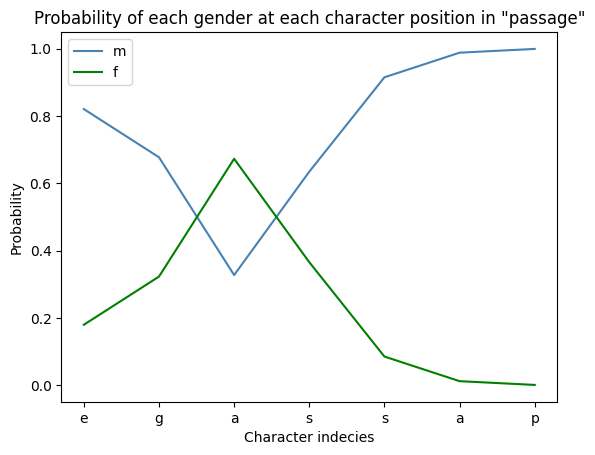

Probability values:
  [('e', {'m': 0.8202007412910461, 'f': 0.17979927361011505}), ('g', {'m': 0.6771420836448669, 'f': 0.32285797595977783}), ('a', {'m': 0.32738587260246277, 'f': 0.6726141571998596}), ('s', {'m': 0.6343653798103333, 'f': 0.36563459038734436}), ('s', {'m': 0.9145453572273254, 'f': 0.08545459061861038}), ('a', {'m': 0.9876405596733093, 'f': 0.012359454296529293}), ('p', {'m': 0.9987899661064148, 'f': 0.0012101043248549104})]
----------------------------------------------------------------------------------------------------



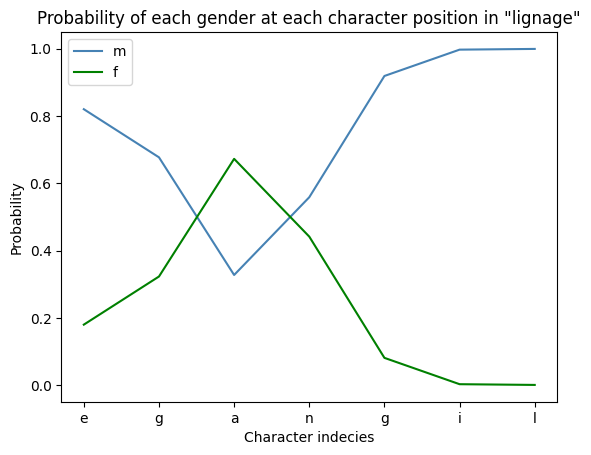

Probability values:
  [('e', {'m': 0.8202007412910461, 'f': 0.17979927361011505}), ('g', {'m': 0.6771420836448669, 'f': 0.32285797595977783}), ('a', {'m': 0.32738587260246277, 'f': 0.6726141571998596}), ('n', {'m': 0.5585436224937439, 'f': 0.4414563477039337}), ('g', {'m': 0.9189692735671997, 'f': 0.08103068172931671}), ('i', {'m': 0.9972493052482605, 'f': 0.0027506444603204727}), ('l', {'m': 0.9993953704833984, 'f': 0.0006045799818821251})]
----------------------------------------------------------------------------------------------------



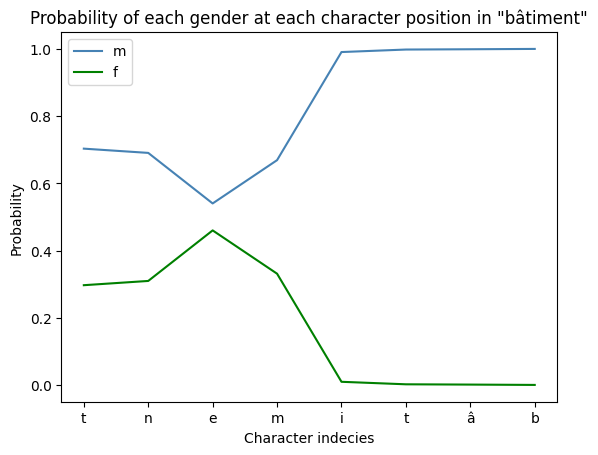

Probability values:
  [('t', {'m': 0.7031623125076294, 'f': 0.296837717294693}), ('n', {'m': 0.6905052065849304, 'f': 0.3094947636127472}), ('e', {'m': 0.5401046872138977, 'f': 0.4598952531814575}), ('m', {'m': 0.6689346432685852, 'f': 0.3310653865337372}), ('i', {'m': 0.9906061291694641, 'f': 0.009393885731697083}), ('t', {'m': 0.9980575442314148, 'f': 0.0019424769561737776}), ('â', {'m': 0.9989087581634521, 'f': 0.001091220648959279}), ('b', {'m': 0.9999043941497803, 'f': 9.56496805883944e-05})]
----------------------------------------------------------------------------------------------------



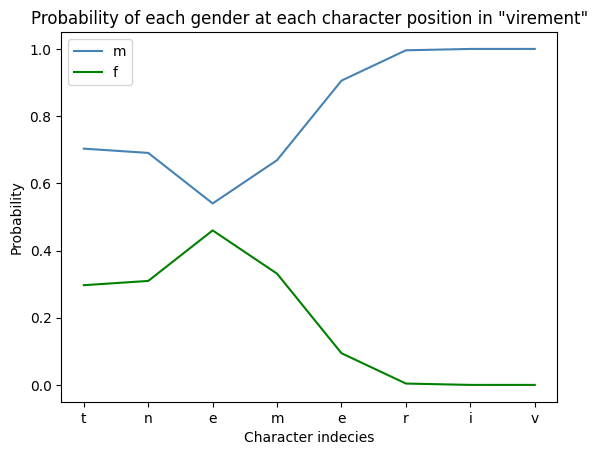

Probability values:
  [('t', {'m': 0.7031623125076294, 'f': 0.296837717294693}), ('n', {'m': 0.6905052065849304, 'f': 0.3094947636127472}), ('e', {'m': 0.5401046872138977, 'f': 0.4598952531814575}), ('m', {'m': 0.6689346432685852, 'f': 0.3310653865337372}), ('e', {'m': 0.9056203961372375, 'f': 0.09437959641218185}), ('r', {'m': 0.9958716034889221, 'f': 0.0041283415630459785}), ('i', {'m': 0.9999113082885742, 'f': 8.869525481713936e-05}), ('v', {'m': 0.9999533891677856, 'f': 4.65758639620617e-05})]
----------------------------------------------------------------------------------------------------



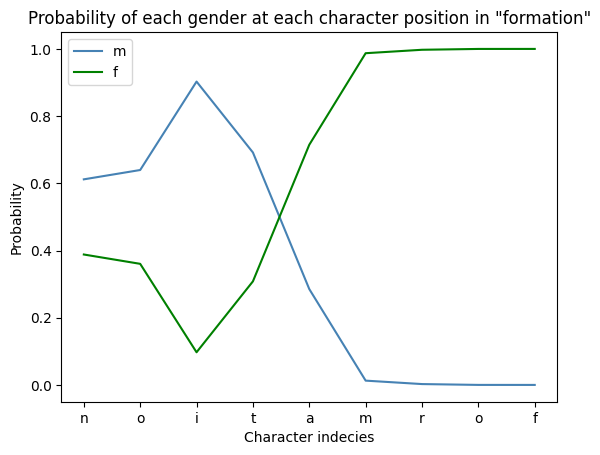

Probability values:
  [('n', {'m': 0.6118127703666687, 'f': 0.3881872296333313}), ('o', {'m': 0.6395881175994873, 'f': 0.3604119122028351}), ('i', {'m': 0.9026873707771301, 'f': 0.09731265157461166}), ('t', {'m': 0.6917385458946228, 'f': 0.3082614541053772}), ('a', {'m': 0.2853143513202667, 'f': 0.7146856784820557}), ('m', {'m': 0.012875785119831562, 'f': 0.9871242046356201}), ('r', {'m': 0.002652366878464818, 'f': 0.9973475933074951}), ('o', {'m': 0.00017906964058056474, 'f': 0.9998210072517395}), ('f', {'m': 0.00012543196498882025, 'f': 0.9998745918273926})]
----------------------------------------------------------------------------------------------------



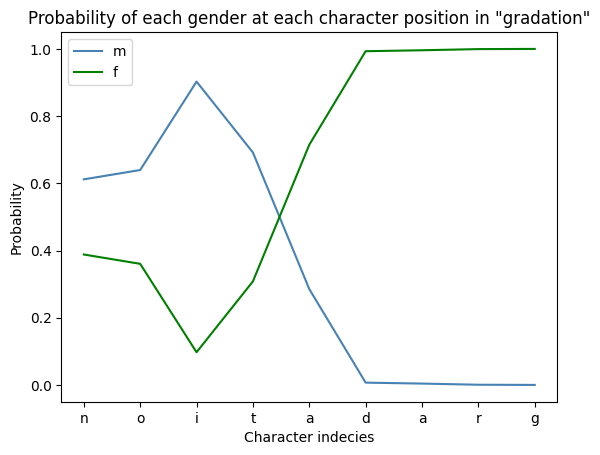

Probability values:
  [('n', {'m': 0.6118127703666687, 'f': 0.3881872296333313}), ('o', {'m': 0.6395881175994873, 'f': 0.3604119122028351}), ('i', {'m': 0.9026873707771301, 'f': 0.09731265157461166}), ('t', {'m': 0.6917385458946228, 'f': 0.3082614541053772}), ('a', {'m': 0.2853143513202667, 'f': 0.7146856784820557}), ('d', {'m': 0.0068738386034965515, 'f': 0.9931261539459229}), ('a', {'m': 0.004084516782313585, 'f': 0.9959154725074768}), ('r', {'m': 0.0006255017360672355, 'f': 0.9993745684623718}), ('g', {'m': 8.241208706749603e-05, 'f': 0.9999176263809204})]


In [10]:
view_plateau('passage', orth_preds)
print('-' * 100 + '\n')
view_plateau('lignage', orth_preds)
print('-' * 100 + '\n')
view_plateau('bâtiment', orth_preds)
print('-' * 100 + '\n')
view_plateau('virement', orth_preds)
print('-' * 100 + '\n')
view_plateau('formation', orth_preds)
print('-' * 100 + '\n')
view_plateau('gradation', orth_preds)

### Phonetic forms

In [11]:
phon_preds = pd.read_csv('../results/echantinom_phon_preds.csv')
phon_preds

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set
0,ɛ,ais,m,m,"[('ɛ', {'m': 0.820267379283905, 'f': 0.1797326...",test
1,ɛ,haie,m,m,"[('ɛ', {'m': 0.820267379283905, 'f': 0.1797326...",test
2,o,eau,m,f,"[('o', {'m': 0.18224085867404938, 'f': 0.81775...",test
3,u,houx,m,m,"[('u', {'m': 0.5277590751647949, 'f': 0.472240...",test
4,ɛ,ais,m,f,"[('ɛ', {'m': 0.820267379283905, 'f': 0.1797326...",test
...,...,...,...,...,...,...
4587,ɛ̃sybɔʁdinasjɔ̃,insubordination,f,f,"[('̃', {'m': 0.3458680510520935, 'f': 0.654131...",test
4588,ɛ̃kɔ̃patibilite,incompatibilité,f,f,"[('e', {'m': 0.7023161053657532, 'f': 0.297683...",test
4589,tʁɑ̃splɑ̃tasjɔ̃,transplantation,f,f,"[('̃', {'m': 0.3458680510520935, 'f': 0.654131...",test
4590,suzalimɑ̃tasjɔ̃,sous-alimentation,f,f,"[('̃', {'m': 0.3458680510520935, 'f': 0.654131...",test


In [14]:
phon_preds['Noun_Length'] = phon_preds['Form'].apply(len)
phon_preds['Probabilities_Length'] = phon_preds['Class Probabilities'].apply(lambda x: len(ast.literal_eval(x)))

filtered_df = phon_preds[phon_preds['Probabilities_Length'] != phon_preds['Noun_Length']]

filtered_df

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,Noun_Length,Probabilities_Length


In [15]:
phon_correct = phon_preds[phon_preds['Predicted Gender'] == phon_preds['True Gender']]

phon_percentage_correct = (phon_correct.shape[0] / phon_preds.shape[0]) * 100
phon_percentage_correct


80.2918118466899

In [16]:
phon_incorrect = phon_preds[phon_preds['Predicted Gender'] != phon_preds['True Gender']]
phon_incorrect

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,Noun_Length,Probabilities_Length
2,o,eau,m,f,"[('o', {'m': 0.18224085867404938, 'f': 0.81775...",test,1,1
4,ɛ,ais,m,f,"[('ɛ', {'m': 0.820267379283905, 'f': 0.1797326...",test,1,1
5,ɛ,haie,m,f,"[('ɛ', {'m': 0.820267379283905, 'f': 0.1797326...",test,1,1
6,mu,mou,m,f,"[('u', {'m': 0.5277590751647949, 'f': 0.472240...",test,2,2
7,mu,moue,m,f,"[('u', {'m': 0.5277590751647949, 'f': 0.472240...",test,2,2
...,...,...,...,...,...,...,...,...
4507,kɔ̃tʁəpwazɔ̃,contrepoison,f,m,"[('̃', {'m': 0.3458680510520935, 'f': 0.654131...",test,12,12
4547,kɔ̃tʁəlamɔ̃tʁ,contre-la-montre,f,m,"[('ʁ', {'m': 0.6266891956329346, 'f': 0.373310...",test,13,13
4553,pɛʁpɑ̃dikylɛʁ,perpendiculaire,m,f,"[('ʁ', {'m': 0.6266891956329346, 'f': 0.373310...",test,13,13
4566,mOdysOpEʁɑ̃di,modus operandi,f,m,"[('i', {'m': 0.6100276708602905, 'f': 0.389972...",test,13,13


In [17]:
nlexique[nlexique['lexeme'].isin(['passage', 'lignage', 'bâtiment', 'virement', 'formation', 'gradation'])]

,lexeme,phon,gen
2918,bâtiment,batimɑ̃,m
12741,formation,fɔʁmasjɔ̃,f
14020,gradation,gʁadasjɔ̃,f
17177,lignage,liɲaʒ,m
21487,passage,pasaʒ,m
30582,virement,viʁəmɑ̃,m


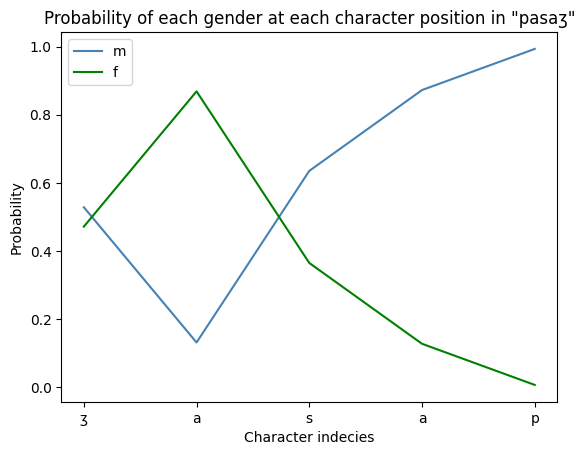

Probability values:
  [('ʒ', {'m': 0.5284577012062073, 'f': 0.47154220938682556}), ('a', {'m': 0.13148464262485504, 'f': 0.8685153722763062}), ('s', {'m': 0.635118842124939, 'f': 0.36488112807273865}), ('a', {'m': 0.8723390102386475, 'f': 0.12766104936599731}), ('p', {'m': 0.9930837154388428, 'f': 0.006916232407093048})]
----------------------------------------------------------------------------------------------------



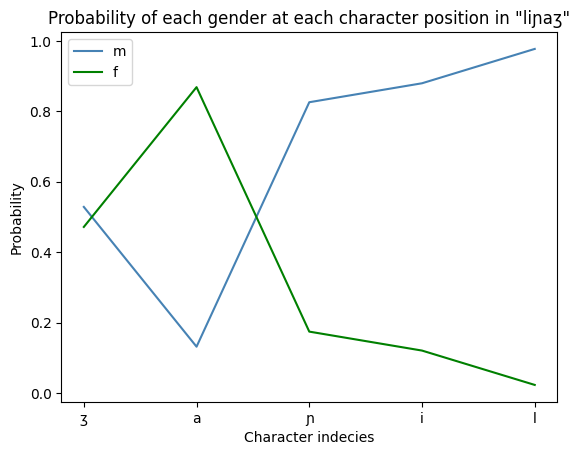

Probability values:
  [('ʒ', {'m': 0.5284577012062073, 'f': 0.47154220938682556}), ('a', {'m': 0.13148464262485504, 'f': 0.8685153722763062}), ('ɲ', {'m': 0.8257102370262146, 'f': 0.1742897778749466}), ('i', {'m': 0.879539966583252, 'f': 0.12046006321907043}), ('l', {'m': 0.977088451385498, 'f': 0.022911597043275833})]
----------------------------------------------------------------------------------------------------



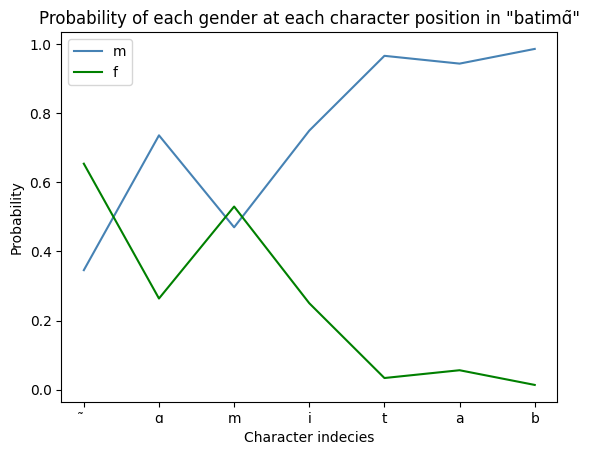

Probability values:
  [('̃', {'m': 0.3458680510520935, 'f': 0.6541319489479065}), ('ɑ', {'m': 0.736218273639679, 'f': 0.26378175616264343}), ('m', {'m': 0.4699433147907257, 'f': 0.5300567150115967}), ('i', {'m': 0.7498618960380554, 'f': 0.25013816356658936}), ('t', {'m': 0.9664484262466431, 'f': 0.03355163708329201}), ('a', {'m': 0.9438879489898682, 'f': 0.056111983954906464}), ('b', {'m': 0.9864243865013123, 'f': 0.01357562281191349})]
----------------------------------------------------------------------------------------------------



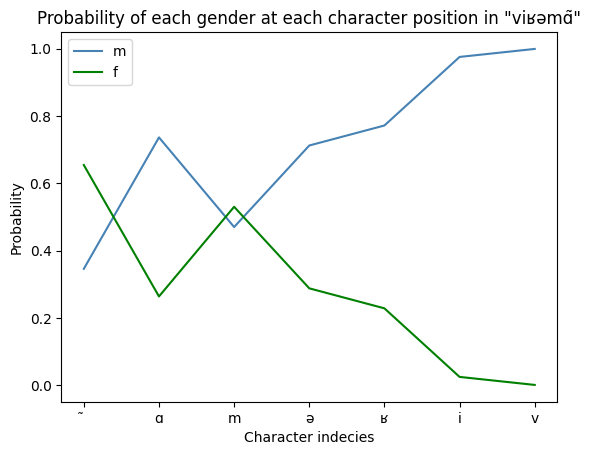

Probability values:
  [('̃', {'m': 0.3458680510520935, 'f': 0.6541319489479065}), ('ɑ', {'m': 0.736218273639679, 'f': 0.26378175616264343}), ('m', {'m': 0.4699433147907257, 'f': 0.5300567150115967}), ('ə', {'m': 0.7121561169624329, 'f': 0.28784388303756714}), ('ʁ', {'m': 0.7715972661972046, 'f': 0.2284027338027954}), ('i', {'m': 0.9752834439277649, 'f': 0.024716556072235107}), ('v', {'m': 0.999082088470459, 'f': 0.0009179574553854764})]
----------------------------------------------------------------------------------------------------



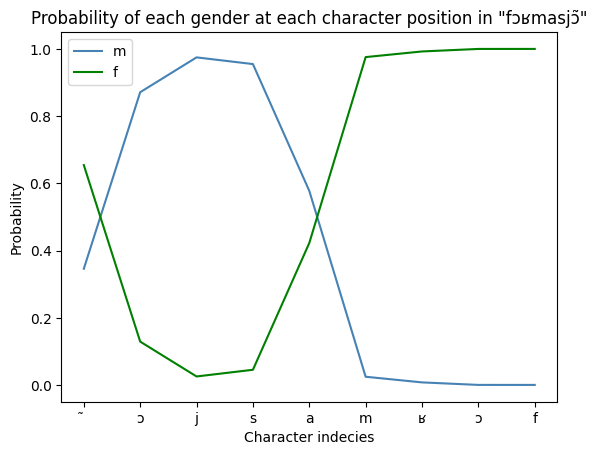

Probability values:
  [('̃', {'m': 0.3458680510520935, 'f': 0.6541319489479065}), ('ɔ', {'m': 0.8710591793060303, 'f': 0.12894080579280853}), ('j', {'m': 0.9747544527053833, 'f': 0.025245558470487595}), ('s', {'m': 0.9548453688621521, 'f': 0.04515458270907402}), ('a', {'m': 0.5776528120040894, 'f': 0.4223472476005554}), ('m', {'m': 0.02441972680389881, 'f': 0.9755802750587463}), ('ʁ', {'m': 0.007605743128806353, 'f': 0.992394208908081}), ('ɔ', {'m': 0.00012765689461957663, 'f': 0.9998723268508911}), ('f', {'m': 8.292907295981422e-05, 'f': 0.9999170303344727})]
----------------------------------------------------------------------------------------------------



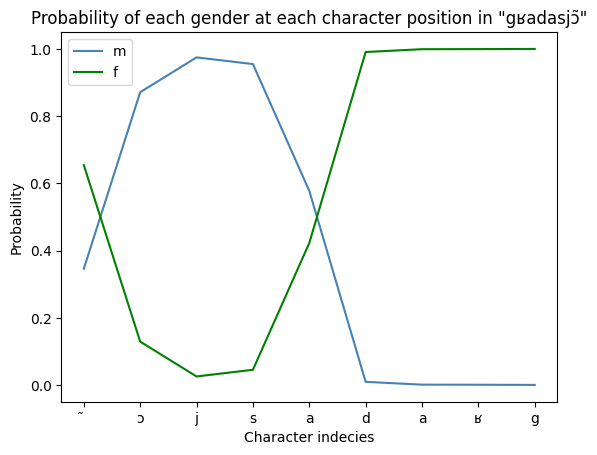

Probability values:
  [('̃', {'m': 0.3458680510520935, 'f': 0.6541319489479065}), ('ɔ', {'m': 0.8710591793060303, 'f': 0.12894080579280853}), ('j', {'m': 0.9747544527053833, 'f': 0.025245558470487595}), ('s', {'m': 0.9548453688621521, 'f': 0.04515458270907402}), ('a', {'m': 0.5776528120040894, 'f': 0.4223472476005554}), ('d', {'m': 0.009261272847652435, 'f': 0.9907387495040894}), ('a', {'m': 0.0009051028173416853, 'f': 0.9990949630737305}), ('ʁ', {'m': 0.000623018539045006, 'f': 0.9993769526481628}), ('g', {'m': 8.097906538750976e-05, 'f': 0.999919056892395})]


In [18]:
view_plateau('pasaʒ', phon_preds)
print('-' * 100 + '\n')
view_plateau('liɲaʒ', phon_preds)
print('-' * 100 + '\n')
view_plateau('batimɑ̃', phon_preds)
print('-' * 100 + '\n')
view_plateau('viʁəmɑ̃', phon_preds)
print('-' * 100 + '\n')
view_plateau('fɔʁmasjɔ̃', phon_preds)
print('-' * 100 + '\n')
view_plateau('gʁadasjɔ̃', phon_preds)